# Ensemble Learning

1. Can we use Bagging for regression problems ?
  - Yes, Bagging can be used for regression. The BaggingRegressor in scikit-learn is specifically designed for this.
2. What is the difference between multiple model training and single model training ?
  - Single model training uses one algorithm on the entire dataset.
Multiple model training (like in ensemble methods) trains several models and combines their outputs for better performance.
3. Explain the concept of feature randomness in Random Forest
  - In each tree, Random Forest selects a random subset of features at each split, not just from the entire dataset, which adds diversity to the trees and reduces overfitting.
4. What is OOB (Out-of-Bag) Score ?
  - OOB score is a validation score using data not included in the bootstrap sample for training a tree. It's like built-in cross-validation in Random Forests.
5. How can you measure the importance of features in a Random Forest model ?
  - By computing how much each feature decreases impurity (like Gini or entropy) or by permutation importance (measuring performance drop when the feature is shuffled).
6. Explain the working principle of a Bagging Classifier
  - It trains multiple models (often decision trees) on random bootstrap samples and combines predictions by majority voting (for classification).
7. How do you evaluate a Bagging Classifier’s performance ?
  - Using metrics like accuracy, precision, recall, F1-score, or AUC, depending on the problem. Cross-validation or OOB score can also be used.
8. How does a Bagging Regressor work ?
  - It trains multiple regressors on random subsets of the data and averages their predictions for the final output.
9. What is the main advantage of ensemble techniques?
  - They improve accuracy and robustness by reducing variance (like Bagging) or bias (like Boosting).
10. What is the main challenge of ensemble methods ?
  - They are often computationally expensive and less interpretable than single models.
11. Explain the key idea behind ensemble techniques
  - Combine multiple models to create a stronger model that performs better than any individual model alone.
12. What is a Random Forest Classifier ?
  - It’s an ensemble method using multiple decision trees trained on random data and features. Predictions are made by majority vote.
13. What are the main types of ensemble techniques?
  - It’s a technique that combines predictions from multiple models to improve overall performance.
14. What is ensemble learning in machine learning?
  - It’s a technique that combines predictions from multiple models to improve overall performance.
15. When should we avoid using ensemble methods ?
  - When the dataset is very small, the model must be interpretable, or computational resources are limited.
16. How does Bagging help in reducing overfitting ?
  - It reduces variance by averaging predictions from many different models trained on different data samples.
17. Why is Random Forest better than a single Decision Tree ?
  - It reduces overfitting, increases accuracy, and is more stable and robust.
18. What is the role of bootstrap sampling in Bagging ?
  - Bootstrap sampling creates diverse training datasets by sampling with replacement, increasing model diversity.
19. What are some real-world applications of ensemble techniques ?
  - Fraud detection
  - Spam filtering
  - Credit scoring
  - Medical diagnosis
  - Stock price prediction
20. What is the difference between Bagging and Boosting?
  - Bagging: Reduces variance, trains models independently.
  - Boosting: Reduces bias, trains models sequentially, focusing on errors.

In [21]:
#21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

bag_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Bagging Classifier Accuracy: {accuracy:.4f}")


Bagging Classifier Accuracy: 0.8720


In [22]:
#22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE)
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

bag_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
bag_reg.fit(X_train, y_train)

y_pred = bag_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Bagging Regressor Mean Squared Error: {mse:.4f}")

Bagging Regressor Mean Squared Error: 8273.2719


In [23]:
#23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

importances = rf_clf.feature_importances_
feature_names = cancer.feature_names

importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df_sorted = importances_df.sort_values(by='Importance', ascending=False)

print(importances_df_sorted)


                    Feature  Importance
27     worst concave points    0.172295
23               worst area    0.123192
7       mean concave points    0.090299
6            mean concavity    0.083215
20             worst radius    0.081277
22          worst perimeter    0.071388
2            mean perimeter    0.053146
13               area error    0.043551
3                 mean area    0.042780
0               mean radius    0.039711
26          worst concavity    0.031740
10             radius error    0.019517
21            worst texture    0.016490
25        worst compactness    0.015801
1              mean texture    0.014604
28           worst symmetry    0.013103
5          mean compactness    0.011402
24         worst smoothness    0.010335
12          perimeter error    0.008682
4           mean smoothness    0.008165
16          concavity error    0.007014
19  fractal dimension error    0.006583
29  worst fractal dimension    0.005182
17     concave points error    0.005047


In [24]:
  #24. Train a Random Forest Regressor and compare its performance with a single Decision Tree
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=20, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f"Decision Tree Regressor MSE: {mse_dt}")
print(f"Random Forest Regressor MSE: {mse_rf}")


Decision Tree Regressor MSE: 20284.894632064203
Random Forest Regressor MSE: 6539.469019512989


In [25]:
#25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=42)

rf_clf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_clf_oob.fit(X_train, y_train)

print(f"Out-of-Bag (OOB) Score: {rf_clf_oob.oob_score_}")



Out-of-Bag (OOB) Score: 0.960093896713615


In [27]:
#26. Train a Bagging Classifier using SVM as a base estimator and print accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

svm = SVC(probability=True)
bagging_svm = BaggingClassifier(estimator=svm, n_estimators=10, random_state=42)
bagging_svm.fit(X_train, y_train)
y_pred = bagging_svm.predict(X_test)

print(accuracy_score(y_test, y_pred))



0.951048951048951


In [28]:
#27. Train a Random Forest Classifier with different numbers of trees and compare accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

for n in [10, 50, 100, 200]:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Accuracy with {n} trees: {accuracy_score(y_test, y_pred)}")


Accuracy with 10 trees: 0.951048951048951
Accuracy with 50 trees: 0.972027972027972
Accuracy with 100 trees: 0.965034965034965
Accuracy with 200 trees: 0.965034965034965


In [29]:
#28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

log_reg = LogisticRegression(max_iter=1000)
bagging = BaggingClassifier(estimator=log_reg, n_estimators=10, random_state=42)
bagging.fit(X_train, y_train)
y_prob = bagging.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

AUC Score: 0.99812734082397


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [30]:
#29. Train a Random Forest Regressor and analyze feature importance scores
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

for feature, importance in zip(data.feature_names, importances):
    print(f"{feature}: {importance}")


age: 0.060202880672469795
sex: 0.009948121257868514
bmi: 0.3431526130236461
bp: 0.1028150672025321
s1: 0.05383823092342256
s2: 0.061385306230863204
s3: 0.05228384970347442
s4: 0.02724494307778295
s5: 0.2222752625315289
s6: 0.06685372537641143


In [31]:
#30. Train an ensemble model using both Bagging and Random Forest and compare accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, random_state=42)

bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)

rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Bagging Accuracy: {bagging_accuracy}")
print(f"Random Forest Accuracy: {rf_accuracy}")


Bagging Accuracy: 0.958041958041958
Random Forest Accuracy: 0.972027972027972


In [32]:
#31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy: {accuracy}")


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy: 0.9649122807017544


In [33]:
#32. Train a Bagging Regressor with different numbers of base estimators and compare performance
from sklearn.datasets import load_diabetes
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

estimators = [5, 10, 20, 50]
for n in estimators:
    model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Estimators: {n}, MSE: {mse}")


Estimators: 5, MSE: 3367.1020224719105
Estimators: 10, MSE: 3256.961797752809
Estimators: 20, MSE: 3202.4416853932585
Estimators: 50, MSE: 3056.494602247191


In [34]:
#33. Train a Random Forest Classifier and analyze misclassified samples
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

misclassified_indices = np.where(y_test != y_pred)[0]
print("Misclassified Sample Indices:", misclassified_indices)
print("Actual Labels:", y_test[misclassified_indices])
print("Predicted Labels:", y_pred[misclassified_indices])


Accuracy: 0.9649122807017544
Misclassified Sample Indices: [ 8 20 77 82]
Actual Labels: [1 0 0 0]
Predicted Labels: [0 1 1 1]


In [35]:
#34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)

bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
bagging_pred = bagging.predict(X_test)
bagging_acc = accuracy_score(y_test, bagging_pred)

print("Decision Tree Accuracy:", dt_acc)
print("Bagging Classifier Accuracy:", bagging_acc)


Decision Tree Accuracy: 0.9473684210526315
Bagging Classifier Accuracy: 0.956140350877193


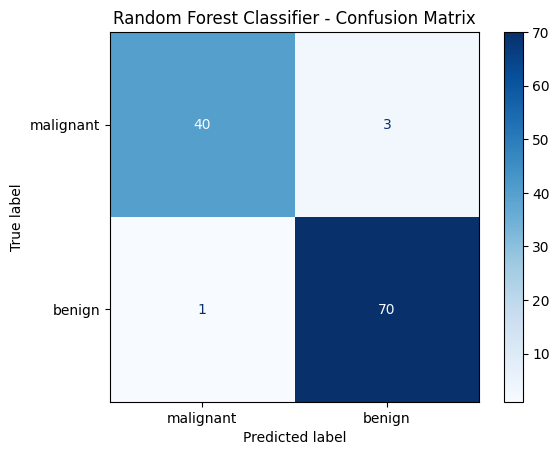

In [36]:
#35. Train a Random Forest Classifier and visualize the confusion matrix
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
cm_display.plot(cmap='Blues')
plt.title('Random Forest Classifier - Confusion Matrix')
plt.show()


In [37]:
#36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
svm = SVC(kernel='linear', probability=True, random_state=42)
lr = LogisticRegression(max_iter=10000, random_state=42)

stacking_model = StackingClassifier(
    estimators=[('dt', dt), ('svm', svm), ('lr', lr)],
    final_estimator=LogisticRegression()
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Stacking Classifier: {accuracy:.4f}')


Accuracy of Stacking Classifier: 0.9561


In [38]:
#37. Train a Random Forest Classifier and print the top 5 most important featurefrom sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

feature_importances = rf.feature_importances_

features_df = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': feature_importances
})

top_5_features = features_df.sort_values(by='Importance', ascending=False).head(5)
print(top_5_features)



                 Feature  Importance
23            worst area    0.153892
27  worst concave points    0.144663
7    mean concave points    0.106210
20          worst radius    0.077987
6         mean concavity    0.068001


In [43]:
  #38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Load dataset
data = load_breast_cancer()

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

# Bagging Classifier using DecisionTree as base estimator
bagging = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=42)
bagging.fit(X_train, y_train)

# Predict on the test data
y_pred = bagging.predict(X_test)

# Calculate Precision, Recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Precision: 0.9583333333333334
Recall: 0.971830985915493
F1-score: 0.965034965034965


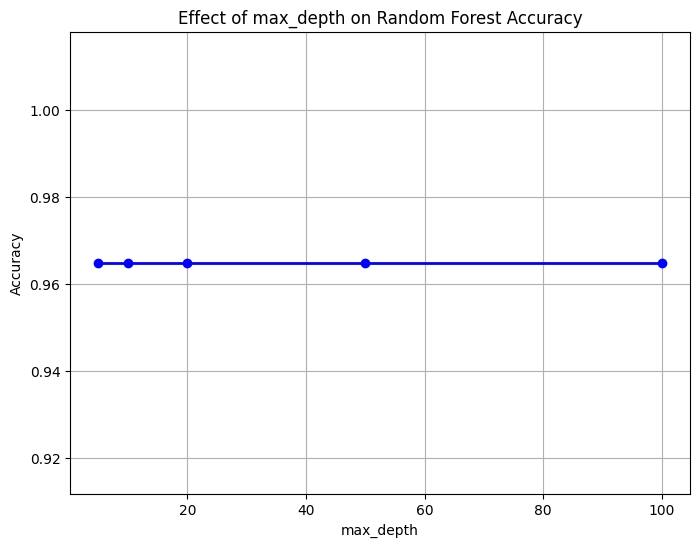

In [44]:
#39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

max_depth_values = [None, 5, 10, 20, 50, 100]

accuracies = []

for max_depth in max_depth_values:
    rf = RandomForestClassifier(max_depth=max_depth, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8, 6))
plt.plot(max_depth_values, accuracies, marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Effect of max_depth on Random Forest Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()



In [46]:
#40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_regressor = DecisionTreeRegressor(random_state=42)
knn_regressor = KNeighborsRegressor()

bagging_dt = BaggingRegressor(estimator=dt_regressor, n_estimators=50, random_state=42)
bagging_knn = BaggingRegressor(estimator=knn_regressor, n_estimators=50, random_state=42)

bagging_dt.fit(X_train, y_train)
bagging_knn.fit(X_train, y_train)

y_pred_dt = bagging_dt.predict(X_test)
y_pred_knn = bagging_knn.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print("Mean Squared Error (Bagging with Decision Tree):", mse_dt)
print("Mean Squared Error (Bagging with KNeighbors):", mse_knn)



Mean Squared Error (Bagging with Decision Tree): 7109.3878911872125
Mean Squared Error (Bagging with KNeighbors): 14362.14582526661


ROC-AUC Score: 0.9952505732066819


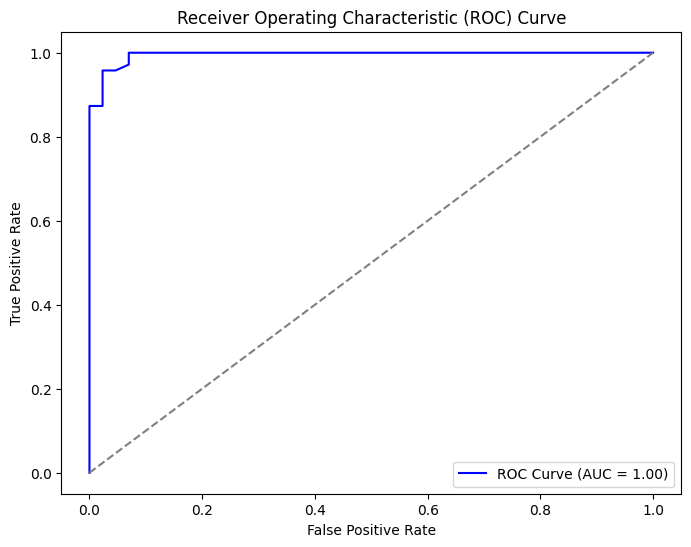

In [47]:
#41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

y_prob = rf_classifier.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [55]:
#42. Train a Bagging Classifier and evaluate its performance using cross-validatio
import sklearn
print(sklearn.__version__)
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Create the bagging classifier (without base_estimator)
bagging = BaggingClassifier(n_estimators=100, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(bagging, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")



1.6.1
Cross-validation scores: [0.89473684 0.93859649 0.99122807 0.96491228 1.        ]


Text(0.5, 1.0, 'Precision-Recall Curve for Random Forest Classifier')

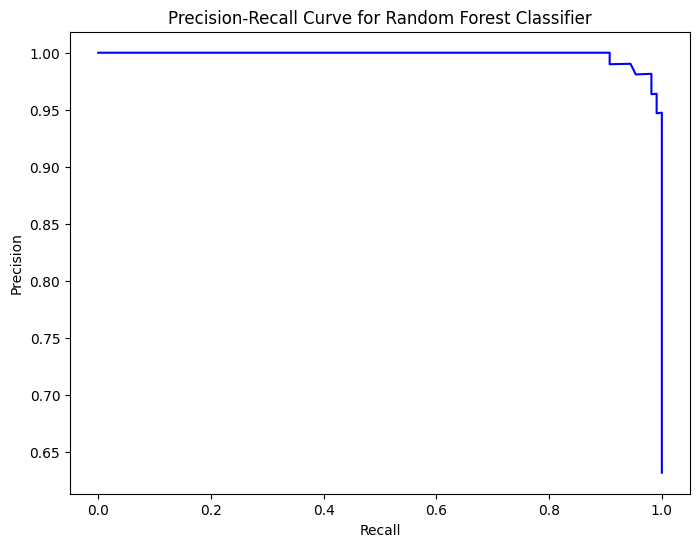

In [56]:
#43. Train a Random Forest Classifier and plot the Precision-Recall curv
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_probs = rf.predict_proba(X_test)[:, 1]

# Compute precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Plot the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Random Forest Classifier')



In [57]:
#44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the base models (Random Forest and Logistic Regression)
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42))
]

# Create the Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Train the Stacking Classifier
stacking_clf.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = stacking_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of Stacking Classifier: {accuracy:.4f}')


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy of Stacking Classifier: 0.9708


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


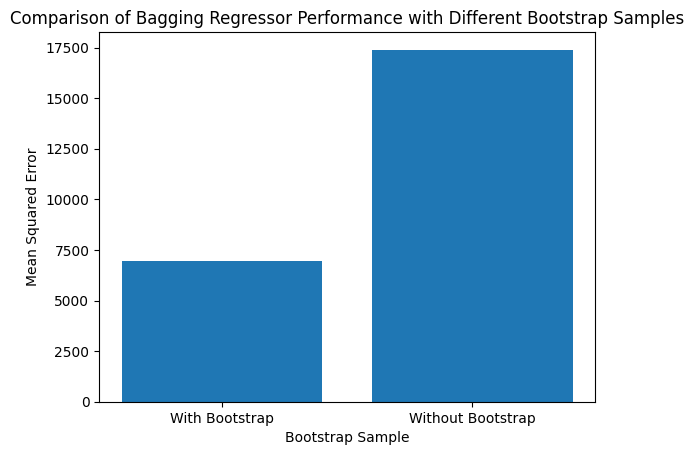

MSE with bootstrap=Yes: 6967.8637
MSE with bootstrap=No: 17390.3687


In [60]:
#45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_regressor = DecisionTreeRegressor(random_state=42)
bootstrap_samples = [True, False]
mse_scores = []

for bootstrap in bootstrap_samples:
    bagging_regressor = BaggingRegressor(estimator=dt_regressor, n_estimators=100, bootstrap=bootstrap, random_state=42)
    bagging_regressor.fit(X_train, y_train)
    y_pred = bagging_regressor.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)

plt.bar(['With Bootstrap', 'Without Bootstrap'], mse_scores)
plt.xlabel('Bootstrap Sample')
plt.ylabel('Mean Squared Error')
plt.title('Comparison of Bagging Regressor Performance with Different Bootstrap Samples')
plt.show()

for i, bootstrap in enumerate(bootstrap_samples):
    print(f'MSE with bootstrap={"Yes" if bootstrap else "No"}: {mse_scores[i]:.4f}')

